# traitement du signal

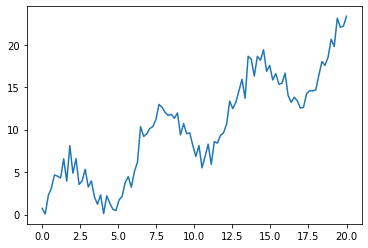

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

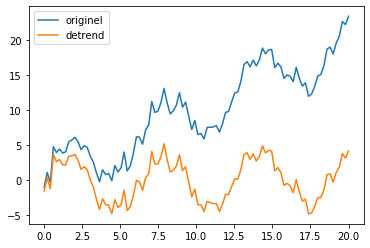

In [3]:
from scipy import signal

# Élimination de la tendance linéaire
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()


## Transformation de Fourier (FFT)

La transformation de Fourier est une technique mathématique puissante et normalement complexe a mettre en oeuvre. Heureusement scipy.fftpack rend cette technique tres simple a implémenter

La transformation de Fourier permet d'analyser les fréquences qui composent un signal périodique (qui se répete avec le temps). Cette opération produit un graphique que l'on appelle Spectre.

Une fois le Spectre généré, il est possible de filtrer les bruits indésirables, ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres... les possibilités sont infinies.

Dans l'exemple ci-dessous, nous voyons comment filtrer un signal noyé dans du bruit.

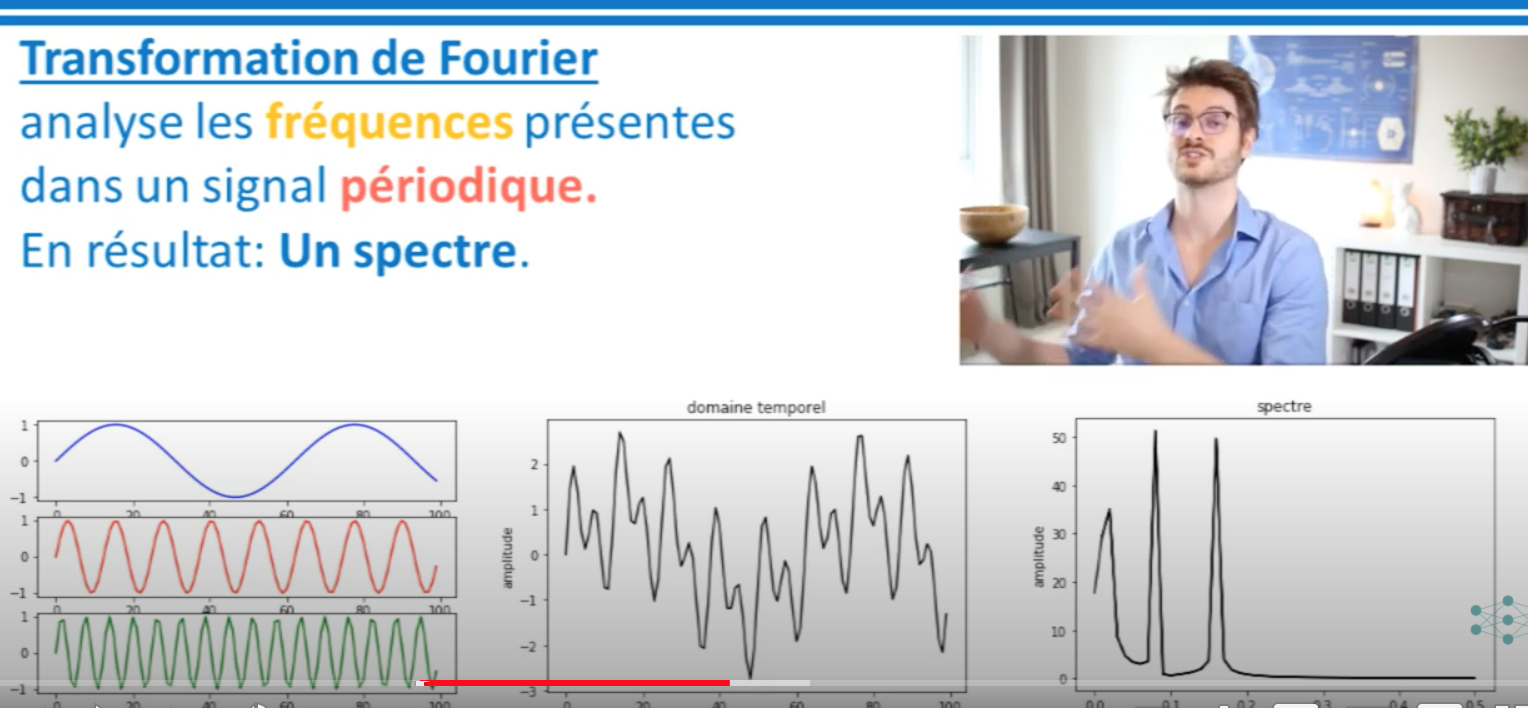

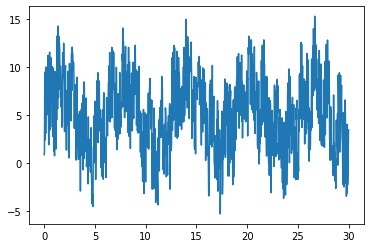

In [7]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

- on a un signal avec beaucoup de bruit
- on le transforme dans une forme de spectre
- on en lève toutes les valeurs en dessous d'un certain seuil pour avoir un signal propre
- on le repasse dans la première forme pour retrouver notre signal sans tout el bruit

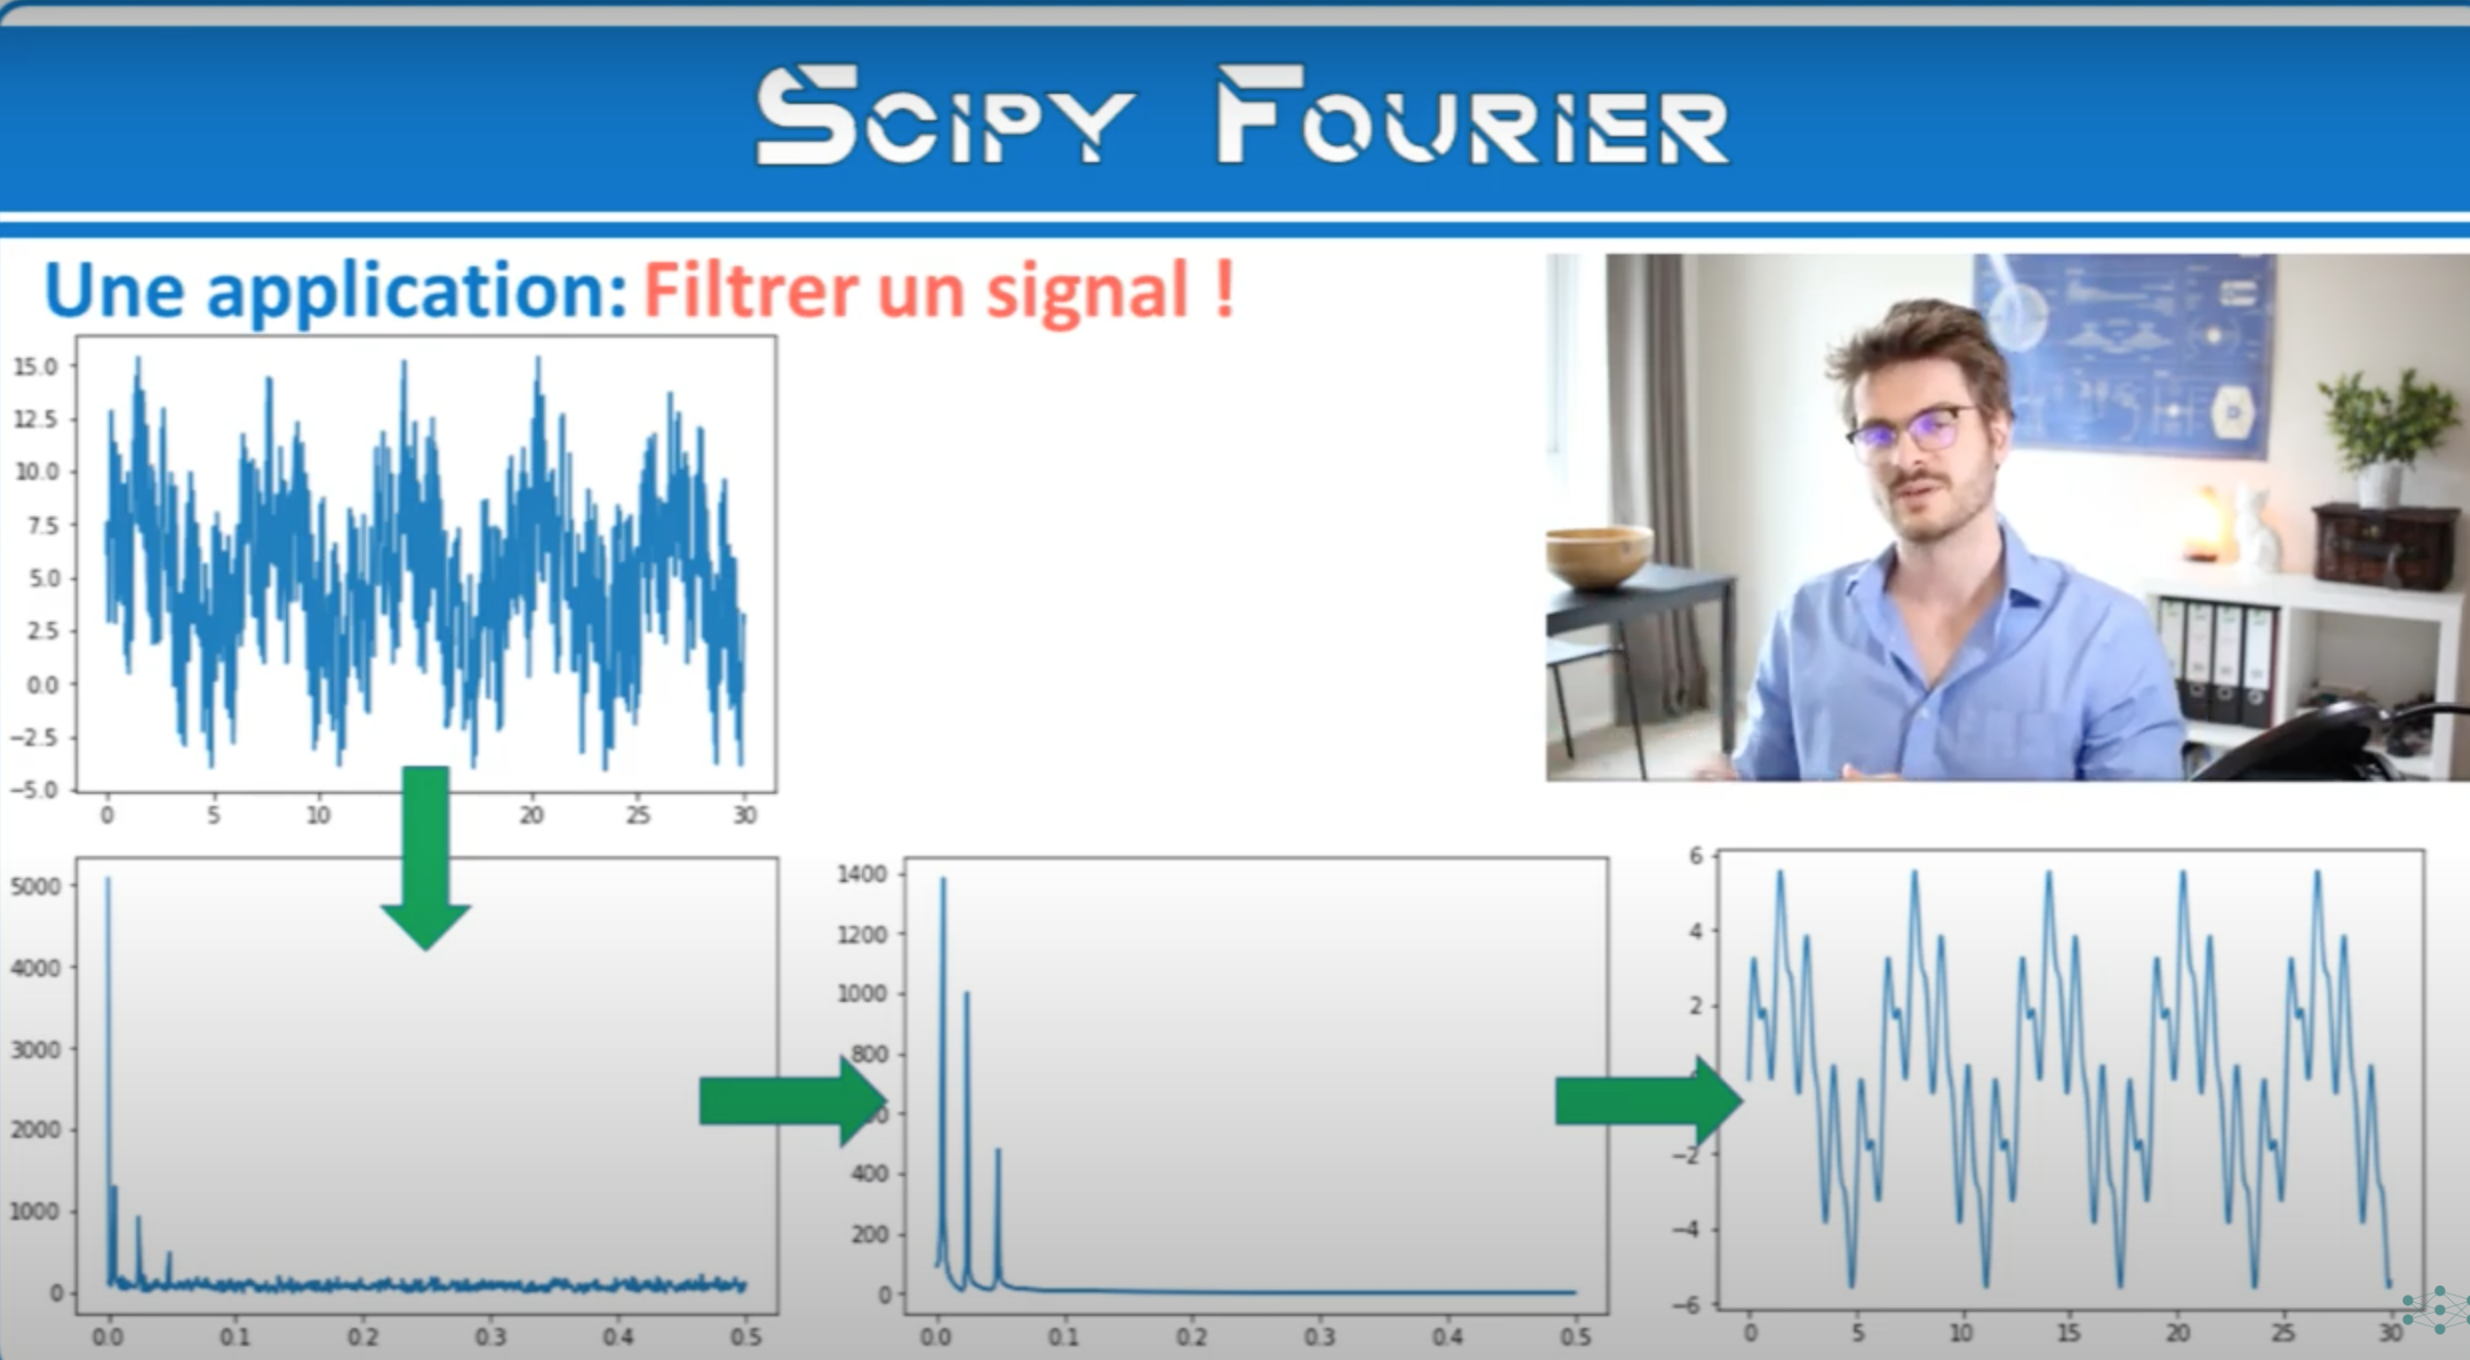

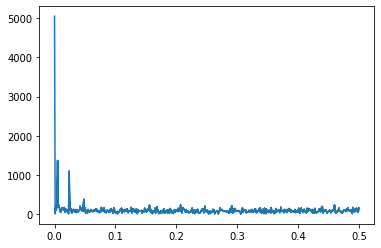

In [8]:
from scipy import fftpack

# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier)# la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

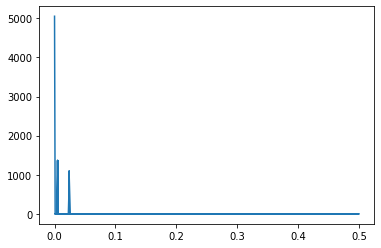

In [9]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [10]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


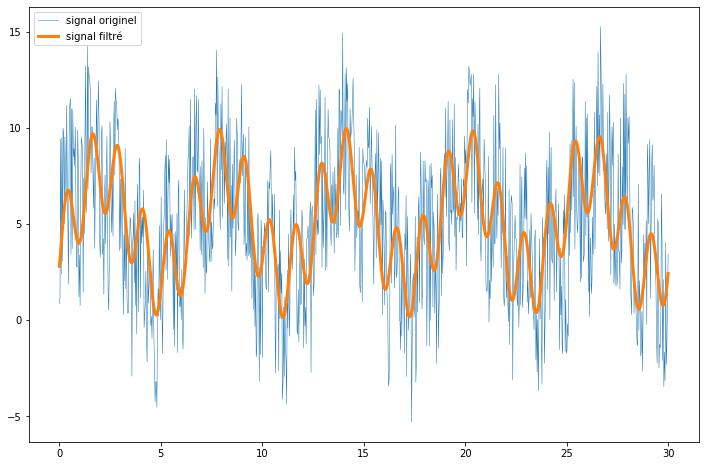

In [11]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()